# Extractive-Text-Summarization

## Importing important libraries

In [67]:
pip install 'PyPDF2<3.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: PyPDF2
    Found existing installation: PyPDF2 3.0.1
    Uninstalling PyPDF2-3.0.1:
      Successfully uninstalled PyPDF2-3.0.1


In [31]:
pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [141]:
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [62]:
loc = "/content/drive/MyDrive/sainsdata/tugas/200411100162_UTS.pdf"

In [79]:
from PyPDF2 import PdfReader

# reader = PdfReader(loc)
# number_of_pages = len(reader.pages)
# page = reader.pages[0]
# text = page.extract_text()

# text

## Function to read the document from user

In [133]:
def readDoc():
    name = "/content/drive/MyDrive/sainsdata/tugas/200411100162_UTS.pdf"
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        # pdfFileObj = open(name, 'rb')
        # pdfR = PdfReader(pdfFileObj)
        # pageObj = pdfR.getPage(0)
        # document = pageObj.extractText()
        reader = PdfReader(name)
        number_of_pages = len(reader.pages)
        page = reader.pages[1]
        text = page.extract_text()
        # page.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(text))
    return text

## Function to tokenize the document

In [134]:
def tokenize(text):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(text)
    return sentences_list

## Read the document

In [135]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

You have asked for the document /content/drive/MyDrive/sainsdata/tugas/200411100162_UTS.pdf
2
<class 'str'>
The length of the file is: 4568


## Generate a list of sentences in the document

In [136]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 304
The size of the item 0 in Bytes is: 202


In [137]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [138]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 31


In [139]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)


 
BAB I. 
 PENDAHULUAN  
 
1.1 Pendahuluan  
Jumlah penderita hepatits C menurut WHO (World Health Organization) pada tahun 2016 mencapai 2,9 juta 
jiwa.
Total kematian akibat penyakit hepatitis adalah sebesar 1,4 juta dengan 48% disebabkan oleh virus 
Hepatitis C [1].
Olaru et al.,  menyebutkan bahwa w ilayah eropa memiliki prevalensi tertinggi untuk Virus 
Hepatitis C yakni sebesar 17,5% [2].
Infeksi Virus Hepatitis C merupakan penyebab utama penyakit hati kronis di 
seluruh dunia.
Penyebaran infeksi Virus Hepatitis C ditularkan dari penggunaan jarum sunt ik yang tidak aman.
Selain itu hubungan seksual pria dan pria juga menjadi penyebab penularan yang cukup besar [3].
Hepatitis C 
dapat menyebar dengan cepat sehingga membuat hepatitis c dianggap bahaya oleh karena itu dibutuhkan 
klasifikasi untuk mengetahui  berapa besar penyebaran yang terjadi dengan menggunakan model klasifikasi.
Penelitian yang dilakukan oleh Sulastri  et al., pada tahun 2019 yakni menganalisis prediksi hepatiti

## Generate term-document matrix (TD matrix) of the data

In [142]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [145]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [148]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
# print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <31x305 sparse matrix of type '<class 'numpy.int64'>'
	with 547 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['01' '03' '12' '155' '17' '1847' '2016' '2019' '2021' '23' '24' '31'
 '3190' '374' '43' '435' '48' '499' '73' '76' '82' '89' '90' '92' '93'
 '94' '95' '97' '_phosphate' 'acites' 'ada' 'adalah' 'ah' 'akibat'
 'akurasi' 'al' 'alanine' 'alb' 'albumin' 'algoritma' 'algoritme' 'alk'
 'alkaline' 'alp' 'alt' 'aman' 'amino' 'an' 'analisis' 'ang' 'anoreksia'
 'antara' 'artikel' 'aspartate' 'ast' 'atau' 'atribut' 'bab' 'bahaya'
 'bahwa' 'baik' 'batas' 'bayes' 'bayesian' 'berapa' 'berdasarkan'
 'berikut' 'berpengaruh' 'berupa' 'besar' 'bil' 'bilirubin' 'cepat' 'che'
 'chol' 'cholesterol' 'choline' 'cnn' 'convolutional' 'crea' 'creatinine'
 'cukup' 'dalam' 'dali' 'dan' 'dapat' 'dari' 'data' 'database' 'dataset'
 'deep' 'dengan' 'di' 'diam

In [149]:
print(cv_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]]


In [175]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
#  normal_matrix.toarray()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.21104914 0.         0.        ]
 [0.         0.         0.         ... 0.12941942 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [183]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)
res_graph

<bound method _cs_matrix.toarray of <305x31 sparse matrix of type '<class 'numpy.float64'>'
	with 547 stored elements in Compressed Sparse Column format>>


<31x31 sparse matrix of type '<class 'numpy.float64'>'
	with 681 stored elements in Compressed Sparse Row format>

## Generate to Graph

Number of edges 356
Number of vertices 31


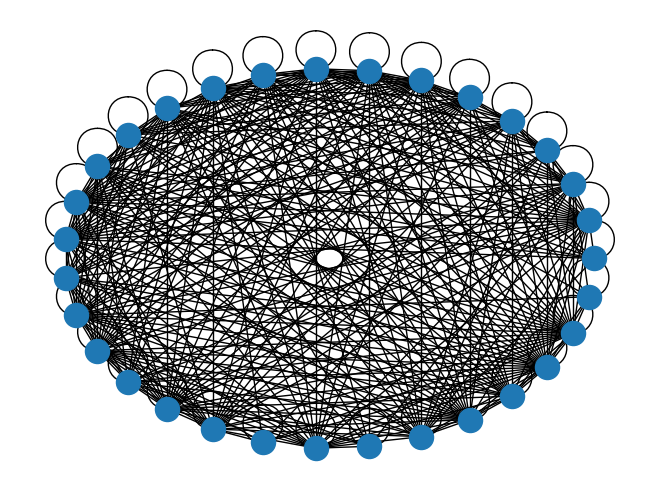

The memory used by the graph in Bytes is: 48


In [184]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created
# (G.subgraph(c) for c in connected_components(G))


nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

## Getting the rank of every sentence using textrank

In [185]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 1176
0 0.022755909752665865
1 0.034856468233281666
2 0.032917312434803225
3 0.02676568343292917
4 0.028941590950407256
5 0.02416761748766346
6 0.03570009750161047
7 0.042895474819240234
8 0.03418784558701265
9 0.032047580145417226
10 0.0281035482293793
11 0.04162284212409862
12 0.02731078492699794
13 0.038951250765455435
14 0.035119527197438535
15 0.03868900877166147
16 0.02417408814938212
17 0.03546496067810785
18 0.03765004901877867
19 0.02445225676736483
20 0.03755278710618554
21 0.03057098251278166
22 0.02387842390614045
23 0.032650216972156976
24 0.025620926824138454
25 0.03916511111857352
26 0.034164075403727734
27 0.02952858411828352
28 0.04184968664019968
29 0.03467975555963982
30 0.023565552864476612


## Finding important sentences and generating summary

In [186]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [187]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [188]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.042895474819240234
0.022755909752665865


In [189]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

31


In [190]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [191]:

# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [192]:
model = sentence_list

## Writing the summary to a new file

In [193]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

Penelitian yang dilakukan oleh Sulastri  et al., pada tahun 2019 yakni menganalisis prediksi hepatitis 
menggunakan algoritma K -Nearest Neighbor, Naïve Bayes serta Neural Network. Rangkaian sekuens DNA yang digunakan untuk pengenalan adalah sekuens 1847 dari database dengan 4 
jenis virus hepatitis C (tipe 1, 2, 3 dan 6) yang diambil dari repositori y ang tersedia di laman ViPR. Dengan menggunakan 
algoritma neural network, diperoleh model klasifikasi dengan akurasi terbaik pada Eksperimen 1 adalah 82,97% 
dengan tingkat kesalahan 17,03%. Pengklasifikasian Virus Hepatitis C menggunakan metode CNN dilakukan oleh Santamar ía et al., pada tahun 
2019. Dengan menggunakan algoritma K -nearest neighbor, diperoleh model klasifikasi dengan 
tingkat akurasi terbaik pada Eksperimen 3 yaitu H.93 dengan tingkat kesalahan 7%. Syafa’ah et al.,  pada tahun 2021 juga melakukan penelitian terkait komparasi metode machine learning 
pada Virus Hepatitis C. Dataset yang digunakan diambil dali UCI machine

<function TextIOWrapper.close()>

In [195]:
for lines in sentence_list:
    print(lines)

Penelitian yang dilakukan oleh Sulastri  et al., pada tahun 2019 yakni menganalisis prediksi hepatitis 
menggunakan algoritma K -Nearest Neighbor, Naïve Bayes serta Neural Network.
Rangkaian sekuens DNA yang digunakan untuk pengenalan adalah sekuens 1847 dari database dengan 4 
jenis virus hepatitis C (tipe 1, 2, 3 dan 6) yang diambil dari repositori y ang tersedia di laman ViPR.
Dengan menggunakan 
algoritma neural network, diperoleh model klasifikasi dengan akurasi terbaik pada Eksperimen 1 adalah 82,97% 
dengan tingkat kesalahan 17,03%.
Pengklasifikasian Virus Hepatitis C menggunakan metode CNN dilakukan oleh Santamar ía et al., pada tahun 
2019.
Dengan menggunakan algoritma K -nearest neighbor, diperoleh model klasifikasi dengan 
tingkat akurasi terbaik pada Eksperimen 3 yaitu H.93 dengan tingkat kesalahan 7%.
Syafa’ah et al.,  pada tahun 2021 juga melakukan penelitian terkait komparasi metode machine learning 
pada Virus Hepatitis C. Dataset yang digunakan diambil dali UCI machine